In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohitter_times=pd.read_csv('mlb_nohitters.csv')

In [3]:
nohitter_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
date               294 non-null int64
game_number        294 non-null int64
winning_team       228 non-null object
losing_team        228 non-null object
winning_pitcher    228 non-null object
dtypes: int64(2), object(3)
memory usage: 11.6+ KB


In [4]:
nohitter_times=nohitter_times['game_number']

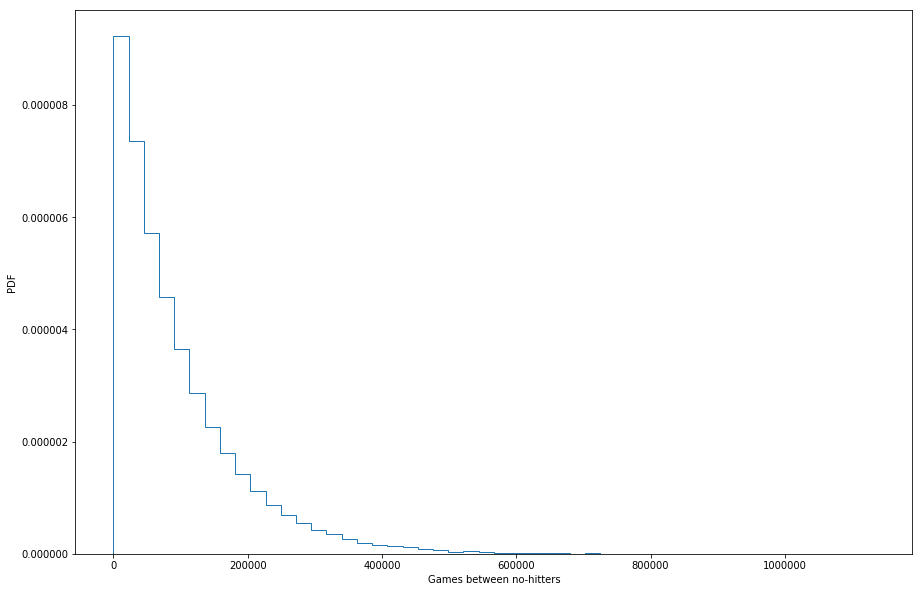

In [5]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.figure(figsize=(15,10))
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [6]:
tau

96509.68027210885

# ECDF

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


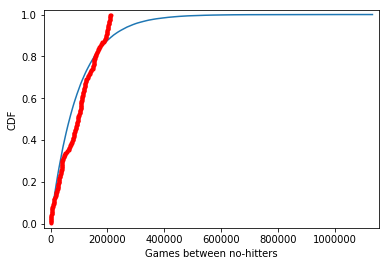

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none',color='red')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


# As we may observe this dataset does not show exponential distribution ..so let's generate one that shows

In [9]:
nohitter_times=np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

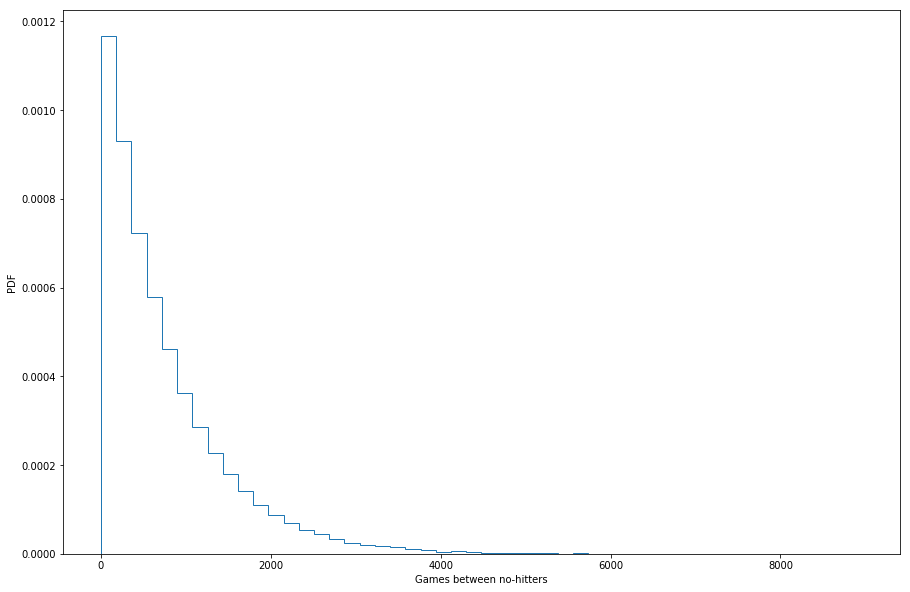

In [10]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

plt.figure(figsize=(15,10))
# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


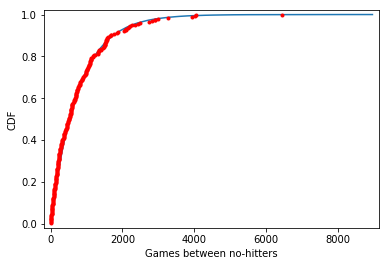

In [11]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none',color='red')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


# So  now we see that our data follows exponential distribution

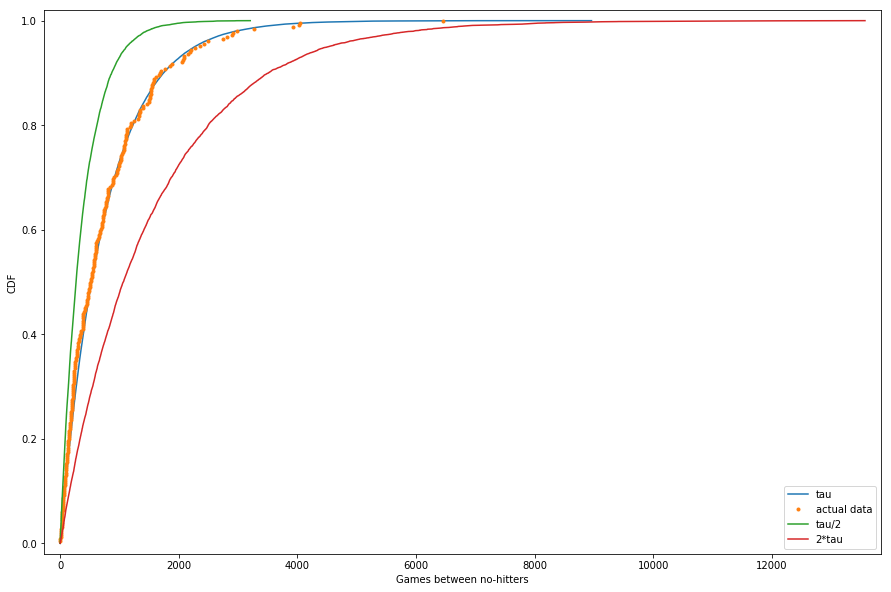

In [12]:
# Plot the theoretical CDFs
plt.figure(figsize=(15,10))
plt.plot(x_theor, y_theor,label='tau')
plt.legend()
plt.plot(x, y, marker='.', linestyle='none',label='actual data')
plt.legend()
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half,label='tau/2')
plt.legend()
_ = plt.plot(x_double, y_double,label='2*tau')
plt.legend()
# Show the plot
plt.show()

# Linear Regression

In [13]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [14]:
df=pd.read_csv('female_literacy_fertility.csv')

In [15]:
df

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"
5,Pakistan,ASI,40.0,3.872,"166,111,487"
6,Bangladesh,ASI,49.8,2.288,"160,000,128"
7,Nigéria,AF,48.8,5.173,"151,212,254"
8,Fédération de Russie,EUR,99.4,1.393,"141,950,000"
9,Japan,ASI,99.0,1.262,"127,704,000"


In [16]:
df['female illiteracy']=100-df['female literacy']

In [17]:
df

,Country,Continent,female literacy,fertility,population,female illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8
5,Pakistan,ASI,40.0,3.872,"166,111,487",60.0
6,Bangladesh,ASI,49.8,2.288,"160,000,128",50.2
7,Nigéria,AF,48.8,5.173,"151,212,254",51.2
8,Fédération de Russie,EUR,99.4,1.393,"141,950,000",0.6
9,Japan,ASI,99.0,1.262,"127,704,000",1.0


In [18]:
illiteracy=df['female illiteracy']

In [19]:
fertility=df['fertility']

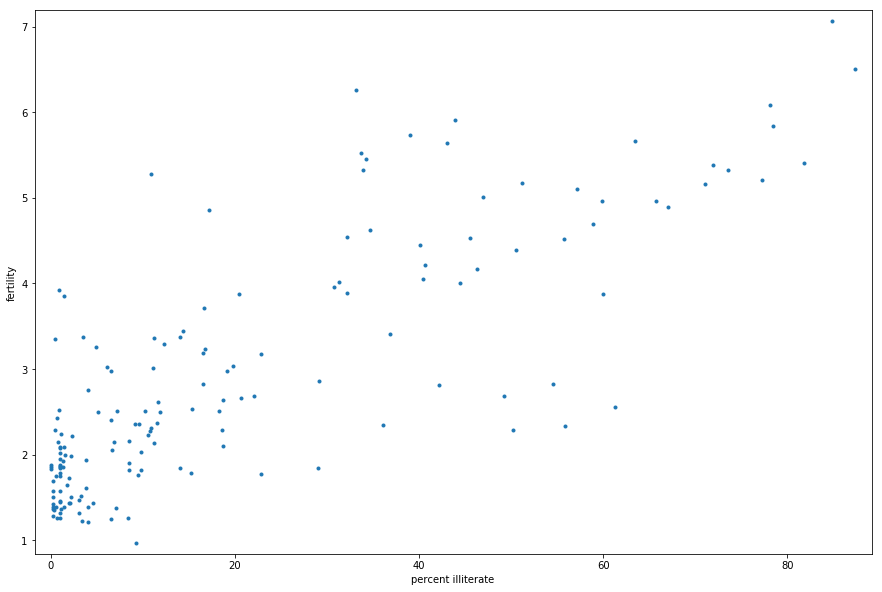

Correlation coefficient equals to:  0.804132402682


In [20]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize=(15,10))
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Correlation coefficient equals to: ',pearson_r(illiteracy, fertility))


slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


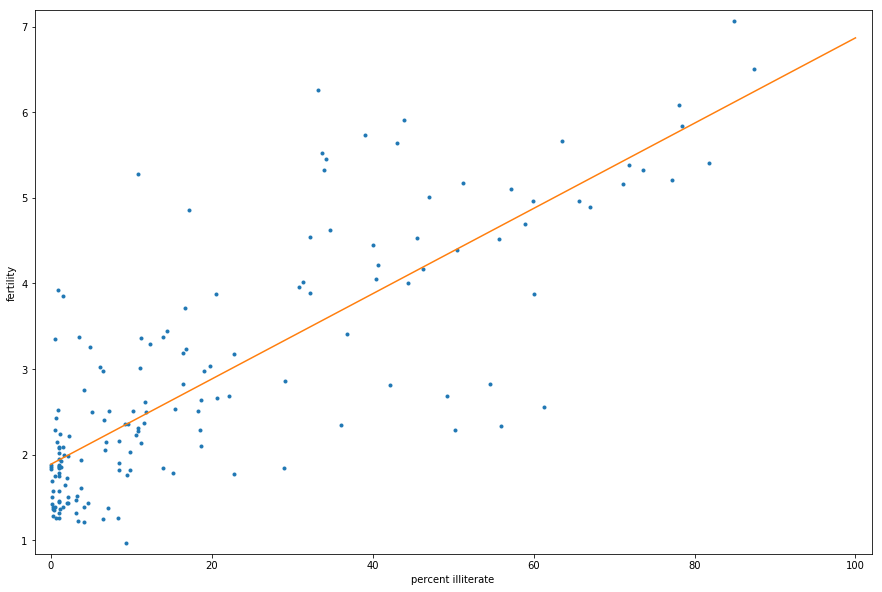

In [21]:
# Plot the illiteracy rate versus fertility
plt.figure(figsize=(15,10))
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


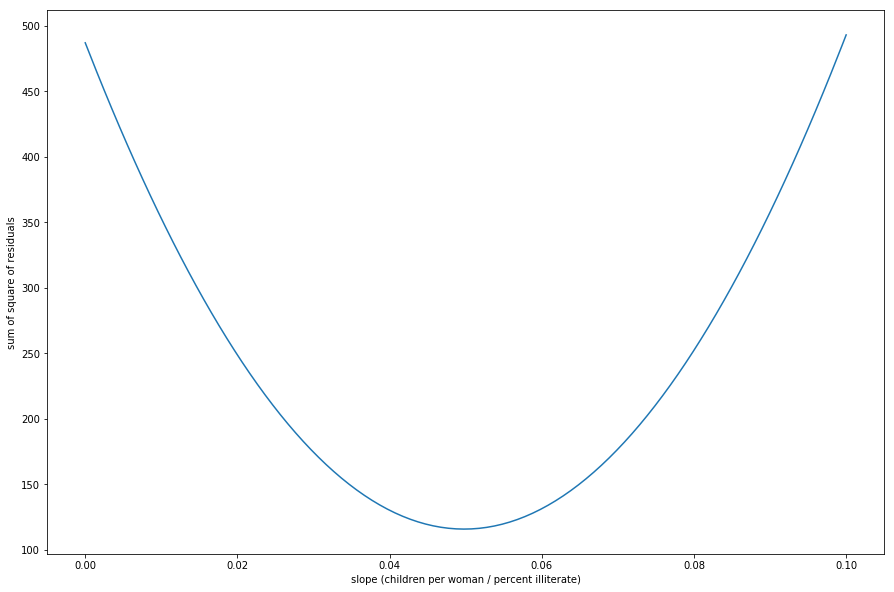

In [22]:
# Specify slopes to consider: a_vals
plt.figure(figsize=(15,10))
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


In [23]:
df=pd.read_csv('anscombe.csv')

In [24]:
df

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [25]:
x=df['0'][1:]
y=df['0.1'][1:]

In [26]:
x=np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y=np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

0.500090909091 3.00009090909


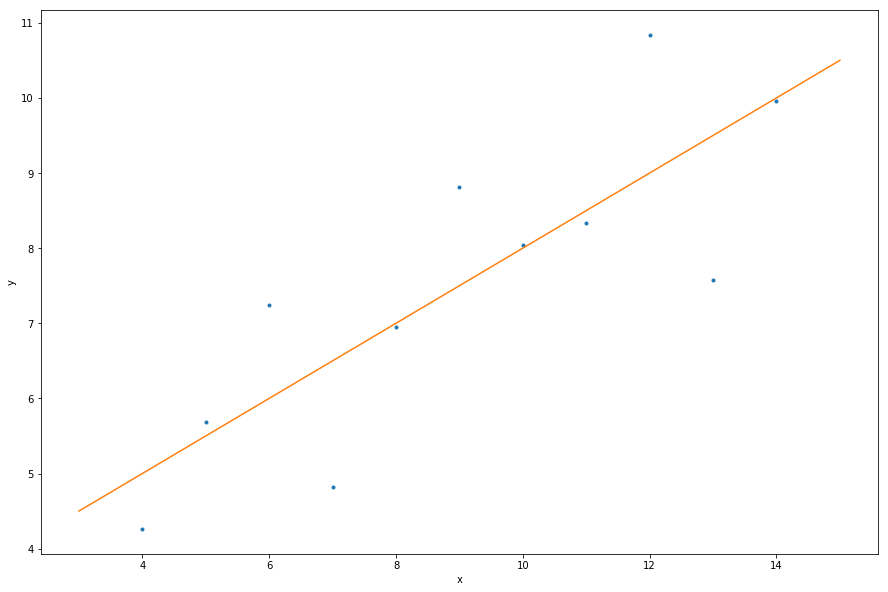

In [27]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
plt.figure(figsize=(15,10))
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [28]:
anscombe_x=[np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]

In [29]:
anscombe_y=[np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
         10.84,   4.82,   5.68]),
 np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13,
         7.26,  4.74]),
 np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39,
          8.15,   6.42,   5.73]),
 np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 ,
          5.56,   7.91,   6.89])]

In [30]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


In [31]:
rainfall=np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

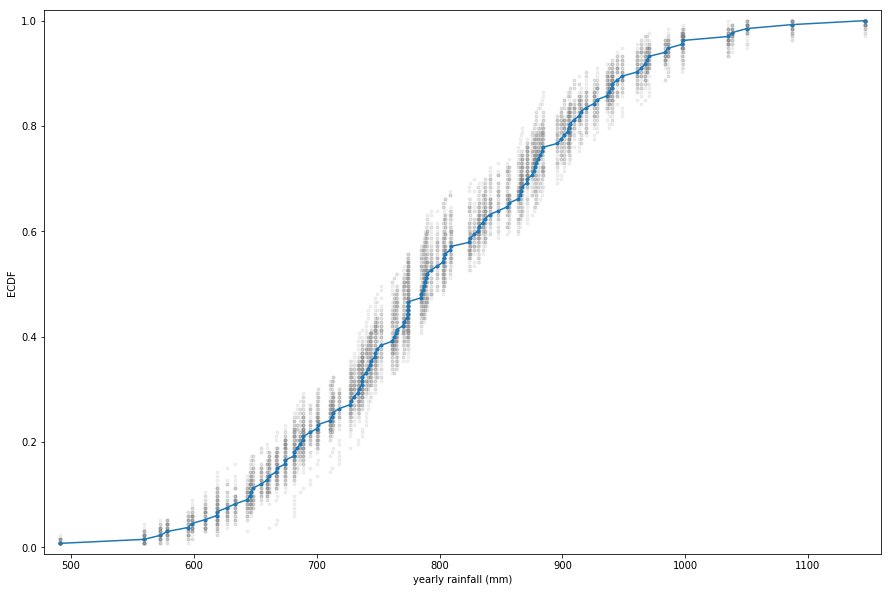

In [32]:
plt.figure(figsize=(15,10))
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [33]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [34]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


 The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.5105491505
10.3587641996


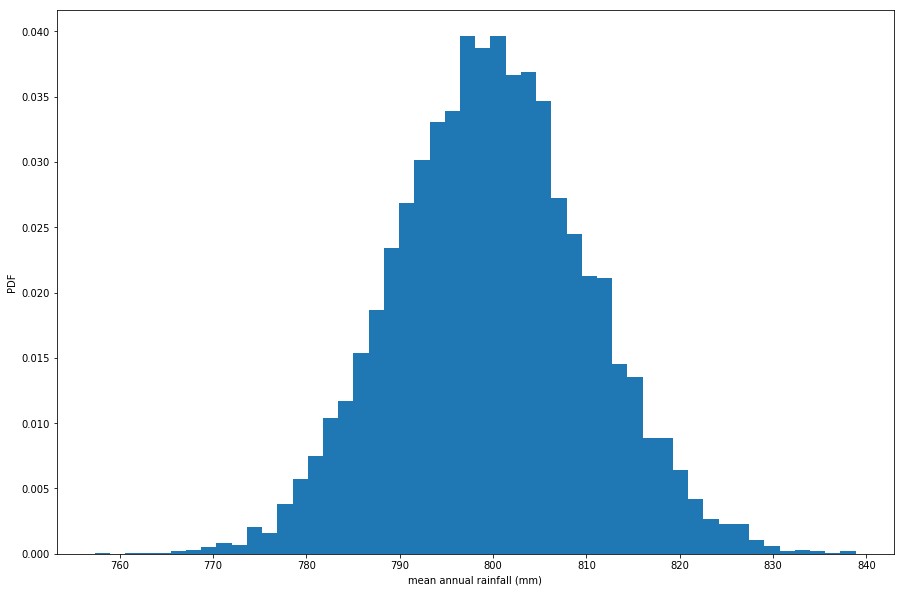

In [35]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
plt.figure(figsize=(15,10))
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [36]:
np.percentile(bs_replicates,q=[0.025,0.975])

array([ 763.48738741,  776.60803609])

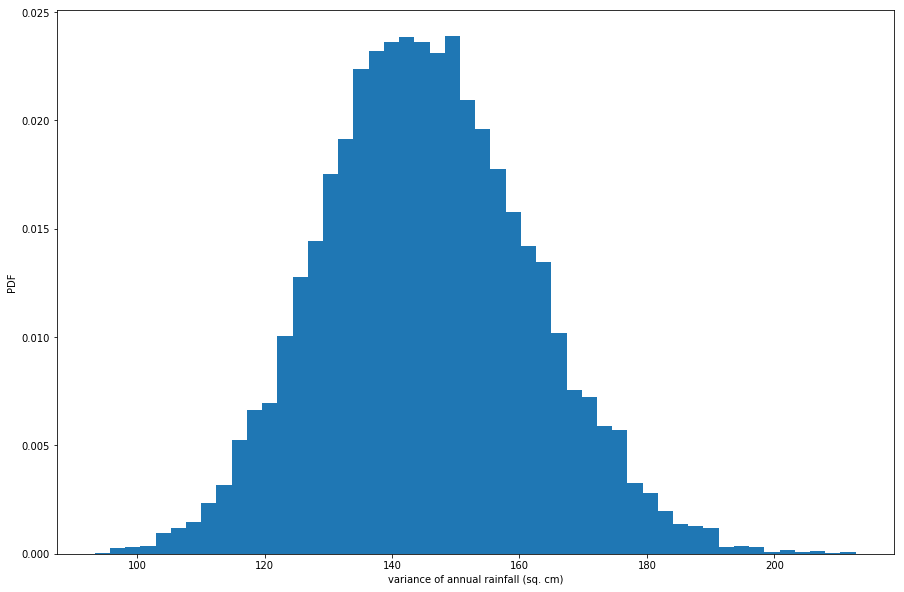

In [37]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates=bs_replicates/100
# Make a histogram of the results
plt.figure(figsize=(15,10))
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

plt.show()
# Show the plot




In [38]:
 np.percentile(bs_replicates,[2.5,97.5])

array([ 114.96790367,  179.21347566])

95% confidence interval = [ 663.65229084  869.79741036] games


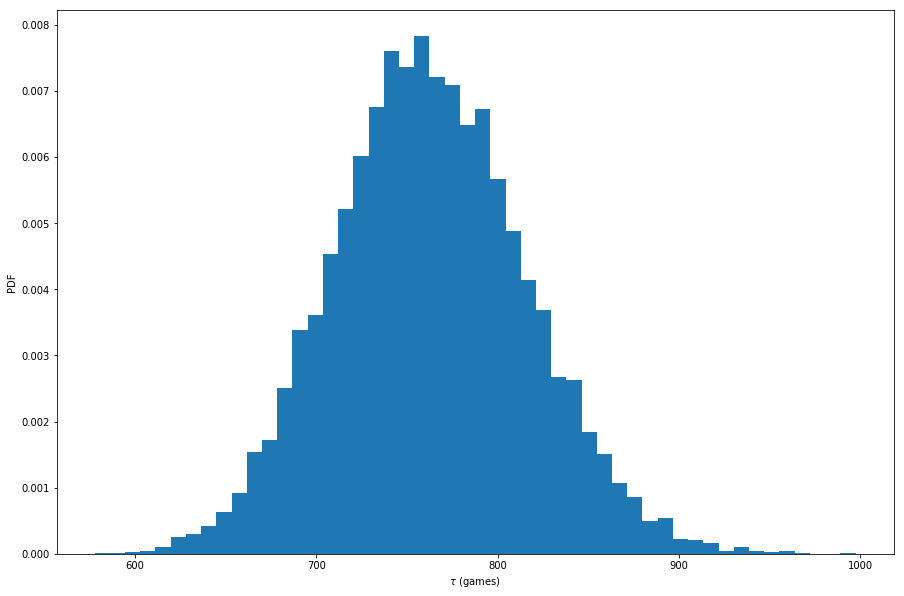

In [39]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean,size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
plt.figure(figsize=(15,10))
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [40]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps


[ 0.04389859  0.05528877]


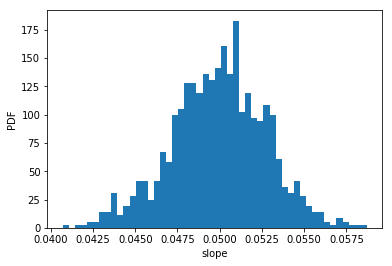

In [41]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

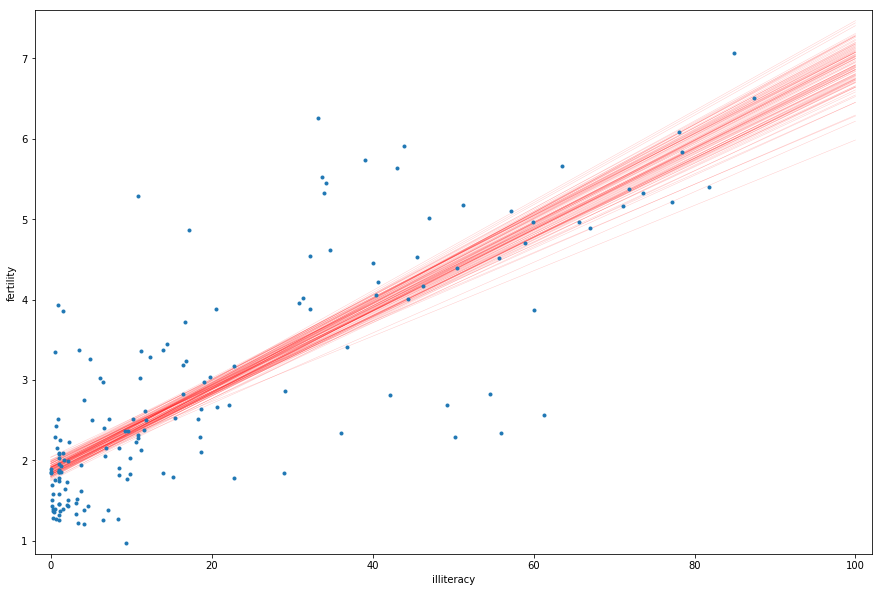

In [42]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

plt.figure(figsize=(15,10))
# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Generating a permutation sample
In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

In [43]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [45]:
rain_june=np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

In [47]:
rain_november=np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

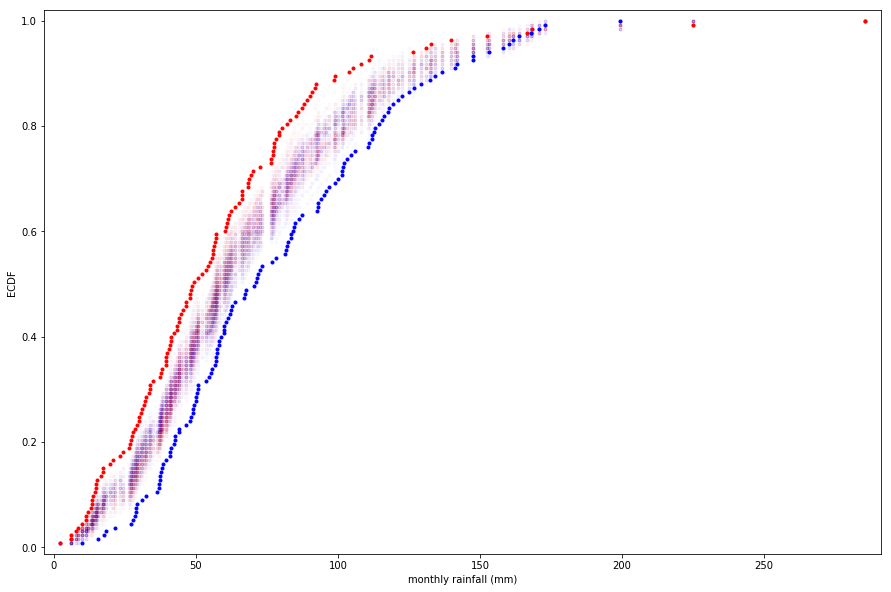

In [48]:
plt.figure(figsize=(15,10))
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

In [52]:
df=pd.read_csv('frog_tongue.csv')

In [53]:
df

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975
5,2013_03_01,I,4,2276,31,3.68,-592,969,0.96,-0.176,341,106,0.69,6676,-1737
6,2013_03_05,I,1,556,43,0.90,-512,835,0.83,-0.285,359,110,0.69,1550,-1427
7,2013_03_05,I,2,1928,46,3.11,-804,508,1.30,-0.285,246,178,0.28,7832,-3266
8,2013_03_05,I,3,2641,50,4.27,-690,491,1.12,-0.239,269,224,0.17,9824,-2568
9,2013_03_05,I,4,1897,41,3.06,-462,839,0.75,-0.328,266,176,0.34,7122,-1733


In [49]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [54]:
df=pd.DataFrame({'ID':['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'],'impact_force':[1.6120000000000001,
 0.60499999999999998,
 0.32700000000000001,
 0.94599999999999995,
 0.54100000000000004,
 1.5389999999999999,
 0.52900000000000003,
 0.628,
 1.4530000000000001,
 0.29699999999999999,
 0.70299999999999996,
 0.26900000000000002,
 0.751,
 0.245,
 1.1819999999999999,
 0.51500000000000001,
 0.435,
 0.38300000000000001,
 0.45700000000000002,
 0.72999999999999998,
 0.17199999999999999,
 0.14199999999999999,
 0.036999999999999998,
 0.45300000000000001,
 0.35499999999999998,
 0.021999999999999999,
 0.502,
 0.27300000000000002,
 0.71999999999999997,
 0.58199999999999996,
 0.19800000000000001,
 0.19800000000000001,
 0.59699999999999998,
 0.51600000000000001,
 0.81499999999999995,
 0.40200000000000002,
 0.60499999999999998,
 0.71099999999999997,
 0.61399999999999999,
 0.46800000000000003]})

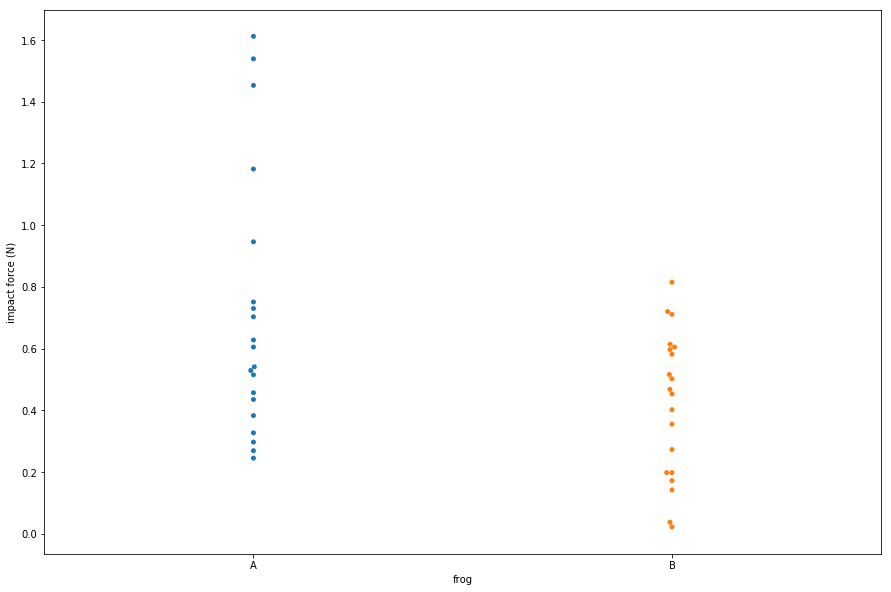

In [56]:
# Make bee swarm plot
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='ID',y='impact_force',data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


In [58]:
force_a=np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])
force_b=np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [59]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0058


In [60]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b-np.mean(force_b)+0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0046


# The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

In [61]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a,force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0053


In [62]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0036


# A two-sample bootstrap hypothesis test for difference of means
You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation. Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This, too, is impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

# A/B Test

In [63]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)


p-value = 0.0002


 # This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

In [65]:
nht_dead=np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [66]:
nht_live=np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [67]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead,nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


In [74]:
df=pd.DataFrame({'beak_depth':[8.4000000000000004,
 8.8000000000000007,
 8.4000000000000004,
 8.0,
 7.9000000000000004,
 8.9000000000000004,
 8.5999999999999996,
 8.5,
 8.9000000000000004,
 9.0999999999999996,
 8.5999999999999996,
 9.8000000000000007,
 8.1999999999999993,
 9.0,
 9.6999999999999993,
 8.5999999999999996,
 8.1999999999999993,
 9.0,
 8.4000000000000004,
 8.5999999999999996,
 8.9000000000000004,
 9.0999999999999996,
 8.3000000000000007,
 8.6999999999999993,
 9.5999999999999996,
 8.5,
 9.0999999999999996,
 9.0,
 9.1999999999999993,
 9.9000000000000004,
 8.5999999999999996,
 9.1999999999999993,
 8.4000000000000004,
 8.9000000000000004,
 8.5,
 10.4,
 9.5999999999999996,
 9.0999999999999996,
 9.3000000000000007,
 9.3000000000000007,
 8.8000000000000007,
 8.3000000000000007,
 8.8000000000000007,
 9.0999999999999996,
 10.1,
 8.9000000000000004,
 9.1999999999999993,
 8.5,
 10.199999999999999,
 10.1,
 9.1999999999999993,
 9.6999999999999993,
 9.0999999999999996,
 8.5,
 8.1999999999999993,
 9.0,
 9.3000000000000007,
 8.0,
 9.0999999999999996,
 8.0999999999999996,
 8.3000000000000007,
 8.6999999999999993,
 8.8000000000000007,
 8.5999999999999996,
 8.6999999999999993,
 8.0,
 8.8000000000000007,
 9.0,
 9.0999999999999996,
 9.7400000000000002,
 9.0999999999999996,
 9.8000000000000007,
 10.4,
 8.3000000000000007,
 9.4399999999999995,
 9.0399999999999991,
 9.0,
 9.0500000000000007,
 9.6500000000000004,
 9.4499999999999993,
 8.6500000000000004,
 9.4499999999999993,
 9.4499999999999993,
 9.0500000000000007,
 8.75,
 9.4499999999999993,
 8.3499999999999996,
 9.4000000000000004,
 8.9000000000000004,
 9.5,
 11.0,
 8.6999999999999993,
 8.4000000000000004,
 9.0999999999999996,
 8.6999999999999993,
 10.199999999999999,
 9.5999999999999996,
 8.8499999999999996,
 8.8000000000000007,
 9.5,
 9.1999999999999993,
 9.0,
 9.8000000000000007,
 9.3000000000000007,
 9.0,
 10.199999999999999,
 7.7000000000000002,
 9.0,
 9.5,
 9.4000000000000004,
 8.0,
 8.9000000000000004,
 9.4000000000000004,
 9.5,
 8.0,
 10.0,
 8.9499999999999993,
 8.1999999999999993,
 8.8000000000000007,
 9.1999999999999993,
 9.4000000000000004,
 9.5,
 8.0999999999999996,
 9.5,
 8.4000000000000004,
 9.3000000000000007,
 9.3000000000000007,
 9.5999999999999996,
 9.1999999999999993,
 10.0,
 8.9000000000000004,
 10.5,
 8.9000000000000004,
 8.5999999999999996,
 8.8000000000000007,
 9.1500000000000004,
 9.5,
 9.0999999999999996,
 10.199999999999999,
 8.4000000000000004,
 10.0,
 10.199999999999999,
 9.3000000000000007,
 10.800000000000001,
 8.3000000000000007,
 7.7999999999999998,
 9.8000000000000007,
 7.9000000000000004,
 8.9000000000000004,
 7.7000000000000002,
 8.9000000000000004,
 9.4000000000000004,
 9.4000000000000004,
 8.5,
 8.5,
 9.5999999999999996,
 10.199999999999999,
 8.8000000000000007,
 9.5,
 9.3000000000000007,
 9.0,
 9.1999999999999993,
 8.6999999999999993,
 9.0,
 9.0999999999999996,
 8.6999999999999993,
 9.4000000000000004,
 9.8000000000000007,
 8.5999999999999996,
 10.6,
 9.0,
 9.5,
 8.0999999999999996,
 9.3000000000000007,
 9.5999999999999996,
 8.5,
 8.1999999999999993,
 8.0,
 9.5,
 9.6999999999999993,
 9.9000000000000004,
 9.0999999999999996,
 9.5,
 9.8000000000000007,
 8.4000000000000004,
 8.3000000000000007,
 9.5999999999999996,
 9.4000000000000004,
 10.0,
 8.9000000000000004,
 9.0999999999999996,
 9.8000000000000007,
 9.3000000000000007,
 9.9000000000000004,
 8.9000000000000004,
 8.5,
 10.6,
 9.3000000000000007,
 8.9000000000000004,
 8.9000000000000004,
 9.6999999999999993,
 9.8000000000000007,
 10.5,
 8.4000000000000004,
 10.0,
 9.0,
 8.6999999999999993,
 8.8000000000000007,
 8.4000000000000004,
 9.3000000000000007,
 9.8000000000000007,
 8.9000000000000004,
 9.8000000000000007,
 9.0999999999999996],'year':[1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 1975,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012]})

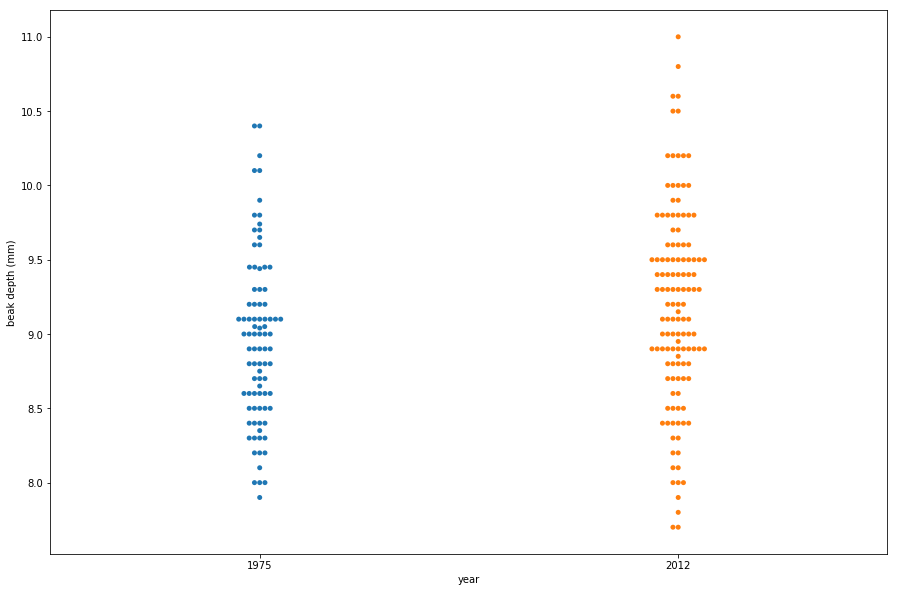

In [77]:
# Create bee swarm plot
plt.figure(figsize=(15,10))
_ = sns.swarmplot(x='year',y='beak_depth',data=df)

# Label the axes

_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

In [78]:
bd_1975=np.array([  8.4 ,   8.8 ,   8.4 ,   8.  ,   7.9 ,   8.9 ,   8.6 ,   8.5 ,
         8.9 ,   9.1 ,   8.6 ,   9.8 ,   8.2 ,   9.  ,   9.7 ,   8.6 ,
         8.2 ,   9.  ,   8.4 ,   8.6 ,   8.9 ,   9.1 ,   8.3 ,   8.7 ,
         9.6 ,   8.5 ,   9.1 ,   9.  ,   9.2 ,   9.9 ,   8.6 ,   9.2 ,
         8.4 ,   8.9 ,   8.5 ,  10.4 ,   9.6 ,   9.1 ,   9.3 ,   9.3 ,
         8.8 ,   8.3 ,   8.8 ,   9.1 ,  10.1 ,   8.9 ,   9.2 ,   8.5 ,
        10.2 ,  10.1 ,   9.2 ,   9.7 ,   9.1 ,   8.5 ,   8.2 ,   9.  ,
         9.3 ,   8.  ,   9.1 ,   8.1 ,   8.3 ,   8.7 ,   8.8 ,   8.6 ,
         8.7 ,   8.  ,   8.8 ,   9.  ,   9.1 ,   9.74,   9.1 ,   9.8 ,
        10.4 ,   8.3 ,   9.44,   9.04,   9.  ,   9.05,   9.65,   9.45,
         8.65,   9.45,   9.45,   9.05,   8.75,   9.45,   8.35])

In [79]:
bd_2012=np.array([  9.4 ,   8.9 ,   9.5 ,  11.  ,   8.7 ,   8.4 ,   9.1 ,   8.7 ,
        10.2 ,   9.6 ,   8.85,   8.8 ,   9.5 ,   9.2 ,   9.  ,   9.8 ,
         9.3 ,   9.  ,  10.2 ,   7.7 ,   9.  ,   9.5 ,   9.4 ,   8.  ,
         8.9 ,   9.4 ,   9.5 ,   8.  ,  10.  ,   8.95,   8.2 ,   8.8 ,
         9.2 ,   9.4 ,   9.5 ,   8.1 ,   9.5 ,   8.4 ,   9.3 ,   9.3 ,
         9.6 ,   9.2 ,  10.  ,   8.9 ,  10.5 ,   8.9 ,   8.6 ,   8.8 ,
         9.15,   9.5 ,   9.1 ,  10.2 ,   8.4 ,  10.  ,  10.2 ,   9.3 ,
        10.8 ,   8.3 ,   7.8 ,   9.8 ,   7.9 ,   8.9 ,   7.7 ,   8.9 ,
         9.4 ,   9.4 ,   8.5 ,   8.5 ,   9.6 ,  10.2 ,   8.8 ,   9.5 ,
         9.3 ,   9.  ,   9.2 ,   8.7 ,   9.  ,   9.1 ,   8.7 ,   9.4 ,
         9.8 ,   8.6 ,  10.6 ,   9.  ,   9.5 ,   8.1 ,   9.3 ,   9.6 ,
         8.5 ,   8.2 ,   8.  ,   9.5 ,   9.7 ,   9.9 ,   9.1 ,   9.5 ,
         9.8 ,   8.4 ,   8.3 ,   9.6 ,   9.4 ,  10.  ,   8.9 ,   9.1 ,
         9.8 ,   9.3 ,   9.9 ,   8.9 ,   8.5 ,  10.6 ,   9.3 ,   8.9 ,
         8.9 ,   9.7 ,   9.8 ,  10.5 ,   8.4 ,  10.  ,   9.  ,   8.7 ,
         8.8 ,   8.4 ,   9.3 ,   9.8 ,   8.9 ,   9.8 ,   9.1 ])

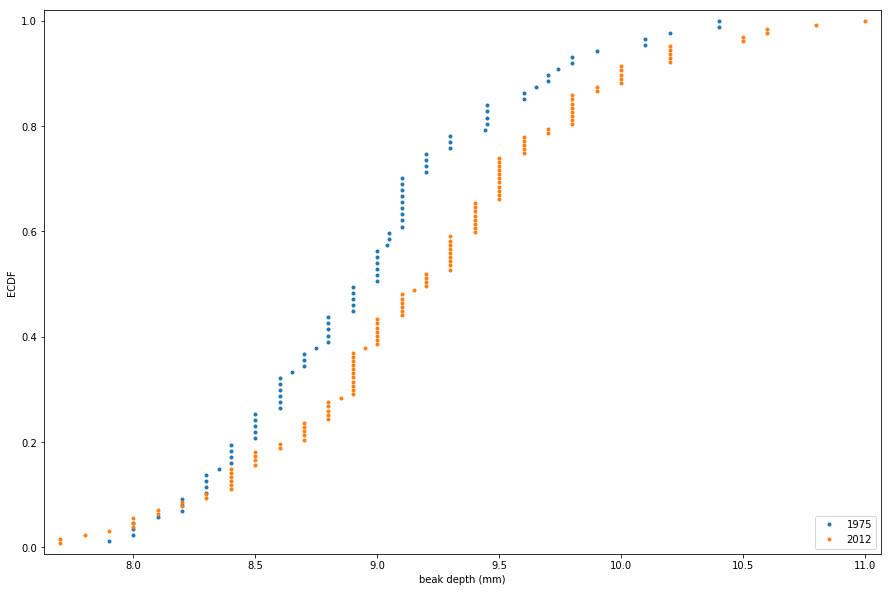

In [81]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
plt.figure(figsize=(15,10))
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [82]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates =bs_replicates_2012-bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])
# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05762236  0.38845418] mm


In [85]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975-np.mean(bd_1975)+combined_mean
bd_2012_shifted = bd_2012-np.mean(bd_2012)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012-bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0031


In [87]:
bl_1975=np.array([ 13.9 ,  14.  ,  12.9 ,  13.5 ,  12.9 ,  14.6 ,  13.  ,  14.2 ,
        14.  ,  14.2 ,  13.1 ,  15.1 ,  13.5 ,  14.4 ,  14.9 ,  12.9 ,
        13.  ,  14.9 ,  14.  ,  13.8 ,  13.  ,  14.75,  13.7 ,  13.8 ,
        14.  ,  14.6 ,  15.2 ,  13.5 ,  15.1 ,  15.  ,  12.8 ,  14.9 ,
        15.3 ,  13.4 ,  14.2 ,  15.1 ,  15.1 ,  14.  ,  13.6 ,  14.  ,
        14.  ,  13.9 ,  14.  ,  14.9 ,  15.6 ,  13.8 ,  14.4 ,  12.8 ,
        14.2 ,  13.4 ,  14.  ,  14.8 ,  14.2 ,  13.5 ,  13.4 ,  14.6 ,
        13.5 ,  13.7 ,  13.9 ,  13.1 ,  13.4 ,  13.8 ,  13.6 ,  14.  ,
        13.5 ,  12.8 ,  14.  ,  13.4 ,  14.9 ,  15.54,  14.63,  14.73,
        15.73,  14.83,  15.94,  15.14,  14.23,  14.15,  14.35,  14.95,
        13.95,  14.05,  14.55,  14.05,  14.45,  15.05,  13.25])

In [88]:
bl_2012=np.array([ 14.3 ,  12.5 ,  13.7 ,  13.8 ,  12.  ,  13.  ,  13.  ,  13.6 ,
        12.8 ,  13.6 ,  12.95,  13.1 ,  13.4 ,  13.9 ,  12.3 ,  14.  ,
        12.5 ,  12.3 ,  13.9 ,  13.1 ,  12.5 ,  13.9 ,  13.7 ,  12.  ,
        14.4 ,  13.5 ,  13.8 ,  13.  ,  14.9 ,  12.5 ,  12.3 ,  12.8 ,
        13.4 ,  13.8 ,  13.5 ,  13.5 ,  13.4 ,  12.3 ,  14.35,  13.2 ,
        13.8 ,  14.6 ,  14.3 ,  13.8 ,  13.6 ,  12.9 ,  13.  ,  13.5 ,
        13.2 ,  13.7 ,  13.1 ,  13.2 ,  12.6 ,  13.  ,  13.9 ,  13.2 ,
        15.  ,  13.37,  11.4 ,  13.8 ,  13.  ,  13.  ,  13.1 ,  12.8 ,
        13.3 ,  13.5 ,  12.4 ,  13.1 ,  14.  ,  13.5 ,  11.8 ,  13.7 ,
        13.2 ,  12.2 ,  13.  ,  13.1 ,  14.7 ,  13.7 ,  13.5 ,  13.3 ,
        14.1 ,  12.5 ,  13.7 ,  14.6 ,  14.1 ,  12.9 ,  13.9 ,  13.4 ,
        13.  ,  12.7 ,  12.1 ,  14.  ,  14.9 ,  13.9 ,  12.9 ,  14.6 ,
        14.  ,  13.  ,  12.7 ,  14.  ,  14.1 ,  14.1 ,  13.  ,  13.5 ,
        13.4 ,  13.9 ,  13.1 ,  12.9 ,  14.  ,  14.  ,  14.1 ,  14.7 ,
        13.4 ,  13.8 ,  13.4 ,  13.8 ,  12.4 ,  14.1 ,  12.9 ,  13.9 ,
        14.3 ,  13.2 ,  14.2 ,  13.  ,  14.6 ,  13.1 ,  15.2 ])

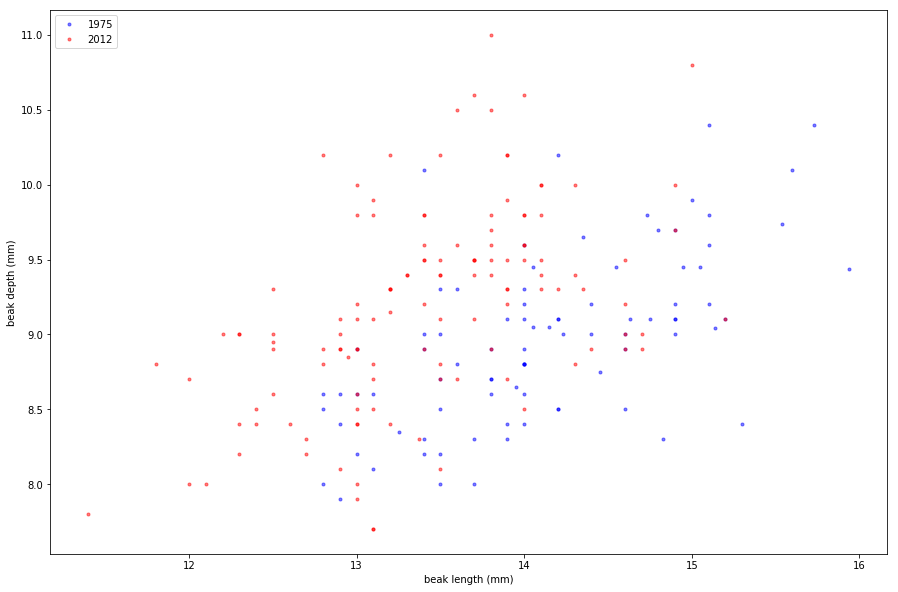

In [90]:
# Make scatter plot of 1975 data
plt.figure(figsize=(15,10))
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [91]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.33382939  0.59005349]
1975: intercept = 2.39087523658 conf int = [ 0.62624601  4.23652895]
2012: slope = 0.462630358835 conf int = [ 0.33032619  0.60122983]
2012: intercept = 2.97724749824 conf int = [ 1.15536151  4.7599249 ]


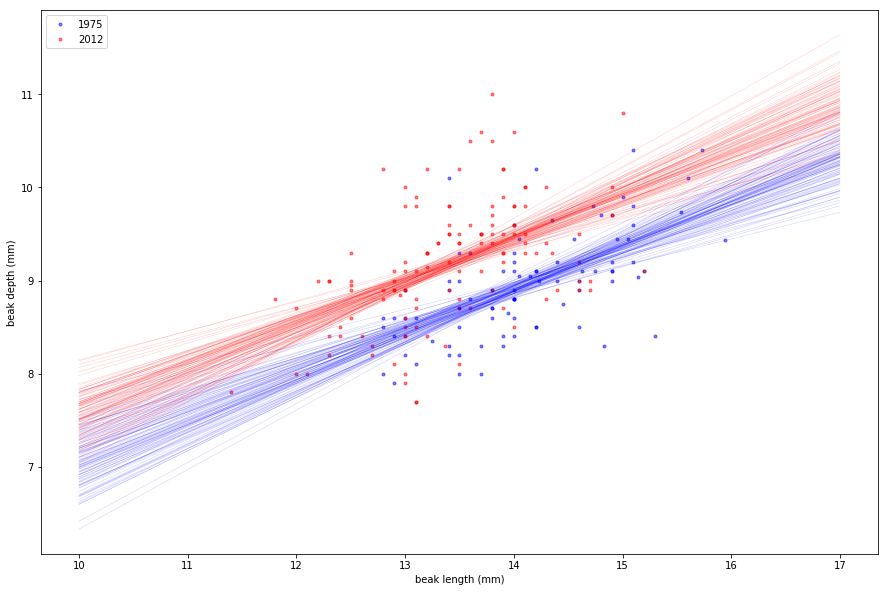

In [93]:
# Make scatter plot of 1975 data
plt.figure(figsize=(15,10))
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [94]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.57888237719 conf int = [ 1.556982    1.60106869]
2012: mean ratio = 1.46583422768 conf int = [ 1.44405295  1.48764104]
